# Introduction


The Data Science 2023 Dataset is obviously a rather relevant dataset for me, a student in Statistical Data Science nearing graduation. I wanted to learn about what salaries to expect, and what distinctions there where in the jobs titles. Furthermore, it provides me a perspective as to what I can expect from the future. There are several key factors to the wage of a job that I've never considered deeply together previously, such experience level, employment type, company size, and geographical location.

In [166]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
import pycountry

## Import Necessary Packages 

Namely we will be using numpy, pandas, matplotlib, sklearn.

In [167]:
data = pd.read_csv("ds_salaries.csv")
data.drop(data[['salary','salary_currency']], axis = 1, inplace = True)
data.isnull().sum()
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M


## Checking the Data

Drop the categories we won't be using. Salary and Salary Currency is not relevent because it is more convenient to use Salary in USD for all countries.

In [168]:

experience_mapping = {
    'EN': 'Entry',
    'MI': 'Mid',
    'EX': 'Executive',
    'SE': 'Senior',
}

data['experience_level'] = data['experience_level'].map(experience_mapping)

job_category_mapping = {
    'Data Engineer': 'Data Engineering',
    'Data Analyst': 'Data Engineering',
    'Analytics Engineer': 'Data Engineering',
    'BI Data Analyst': 'Data Engineering',
    'Business Data Analyst': 'Data Engineering',
    'BI Developer': 'Data Engineering',
    'BI Analyst': 'Data Engineering',
    'Business Intelligence Engineer': 'Data Engineering',
    'BI Data Engineer': 'Data Engineering',
    'Power BI Developer': 'Data Engineering',
    'Data Scientist': 'Data Science',
    'Applied Scientist': 'Data Science',
    'Research Scientist': 'Data Science',
    '3D Computer Vision Researcher': 'Data Science',
    'Deep Learning Researcher': 'Data Science',
    'AI/Computer Vision Engineer': 'Data Science',
    'Machine Learning Engineer': 'Machine Learning',
    'ML Engineer': 'Machine Learning',
    'Lead Machine Learning Engineer': 'Machine Learning',
    'Principal Machine Learning Engineer': 'Machine Learning',
    'Data Architect': 'Data Architecture',
    'Big Data Architect': 'Data Architecture',
    'Cloud Data Architect': 'Data Architecture',
    'Principal Data Architect': 'Data Architecture',
    'Data Science Manager': 'Management',
    'Director of Data Science': 'Management',
    'Head of Data Science': 'Management',
    'Data Scientist Lead': 'Management',
    'Head of Machine Learning': 'Management',
    'Manager Data Management': 'Management',
    'Data Analytics Manager': 'Management',
}

data['job_category'] = data['job_title'].map(job_category_mapping).fillna('Other')


## Data Cleaning 

The original labels for experience felt unintuitive and frustrating, so it is mapped to a more legible label. Furthermore, job titles tend to not be universal, with slight variations occuring in otherwise similar job roles. Once again using mapping, they are categorized into bins so it can be visualized more cleanly.

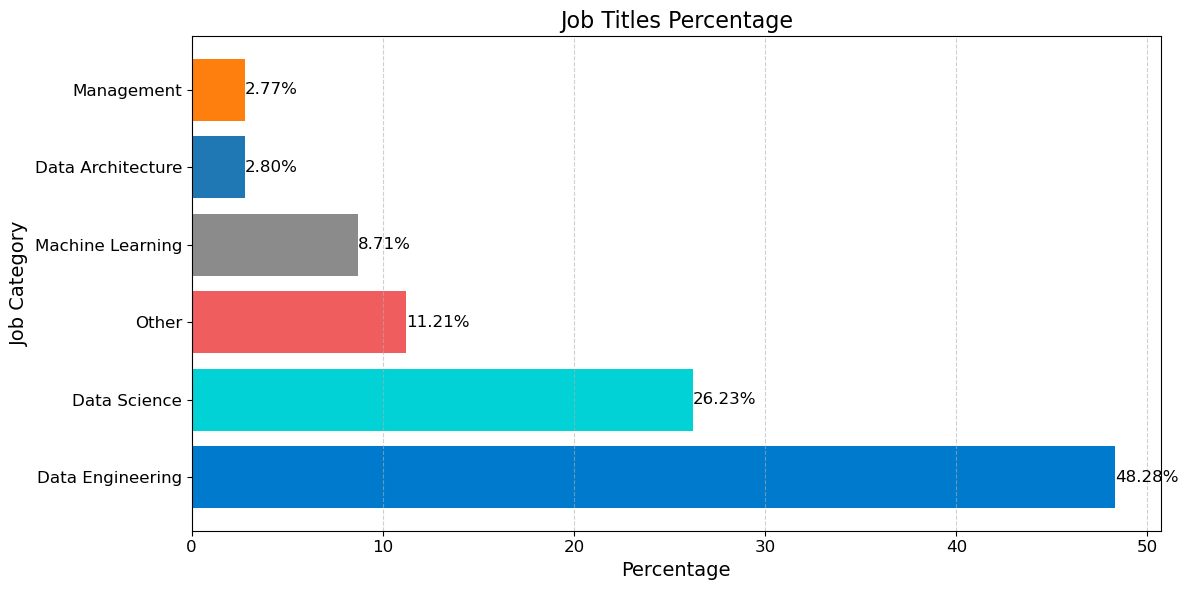

In [169]:
value_counts = data['job_category'].value_counts(normalize=True) * 100
# Create a figure and axis with custom background color
fig, ax = plt.subplots(figsize=(12, 6))

# Define custom colors for the bars
bar_colors = ['#007ACC', '#00D2D5', '#F05D5E', '#8B8B8B', '#1F77B4', '#FF7F0E', '#2CA02C', '#D62728']

# Plot the horizontal bars with custom colors
top_n = min(15, len(value_counts))
bars = ax.barh(value_counts.index[:top_n], value_counts.values[:top_n], color=bar_colors)

# Customize the appearance of the chart
ax.set_xlabel('Percentage', fontsize=14)
ax.set_ylabel('Job Category', fontsize=14)
ax.set_title('Job Titles Percentage', fontsize=16)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.grid(axis='x', linestyle='--', alpha=0.6)

# Add data labels to the bars
for bar in bars:
    width = bar.get_width()
    label_x_pos = width if width >= 1 else width + 1  # Adjust label position for small values
    ax.text(label_x_pos, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', va='center', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


## Analysis I

With the data cleaned, it is so much clearer what specific job title most commonly fits those surveyed, that being the Data Engineering. As expected a managemement role is much rarer, at a mere 2.77%. 

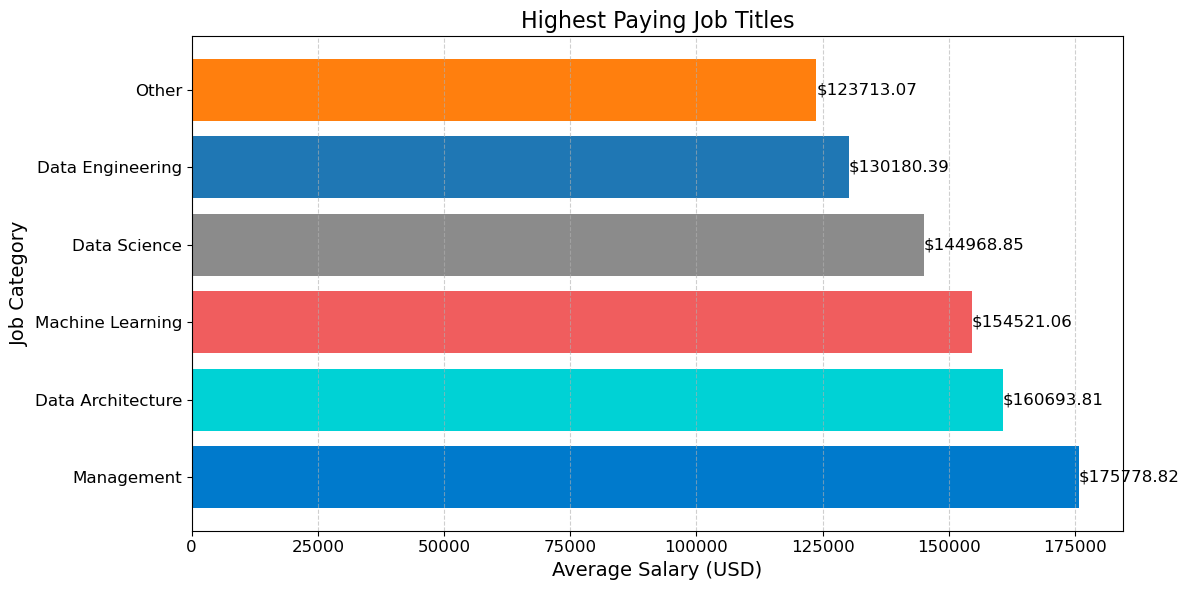

In [170]:
# Group the data by 'job_category' and calculate the mean salary for each category
average_salary_by_category = data.groupby('job_category')['salary_in_usd'].mean().sort_values(ascending=False)

# Create a figure and axis with custom background color
fig, ax = plt.subplots(figsize=(12, 6))

# Define custom colors for the bars
bar_colors = ['#007ACC', '#00D2D5', '#F05D5E', '#8B8B8B', '#1F77B4', '#FF7F0E', '#2CA02C', '#D62728']

# Plot the horizontal bars with custom colors
top_n = min(15, len(average_salary_by_category))
bars = ax.barh(average_salary_by_category.index[:top_n], average_salary_by_category.values[:top_n], color=bar_colors)

# Customize the appearance of the chart
ax.set_xlabel('Average Salary (USD)', fontsize=14)
ax.set_ylabel('Job Category', fontsize=14)
ax.set_title('Highest Paying Job Titles', fontsize=16)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.grid(axis='x', linestyle='--', alpha=0.6)

# Add data labels to the bars
for bar in bars:
    width = bar.get_width()
    label_x_pos = width if width >= 1 else width + 1  # Adjust label position for small values
    ax.text(label_x_pos, bar.get_y() + bar.get_height() / 2, f'${width:.2f}', va='center', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


# Analysis I (cont)

The average salary earned is inversely proportional to the most common jobs in Data Science. There is an exception in the Others category, likely consisting of freelancers and niche occupations within the field. However, the fact that all categories easily clear 6 figures is an impressive statistic.

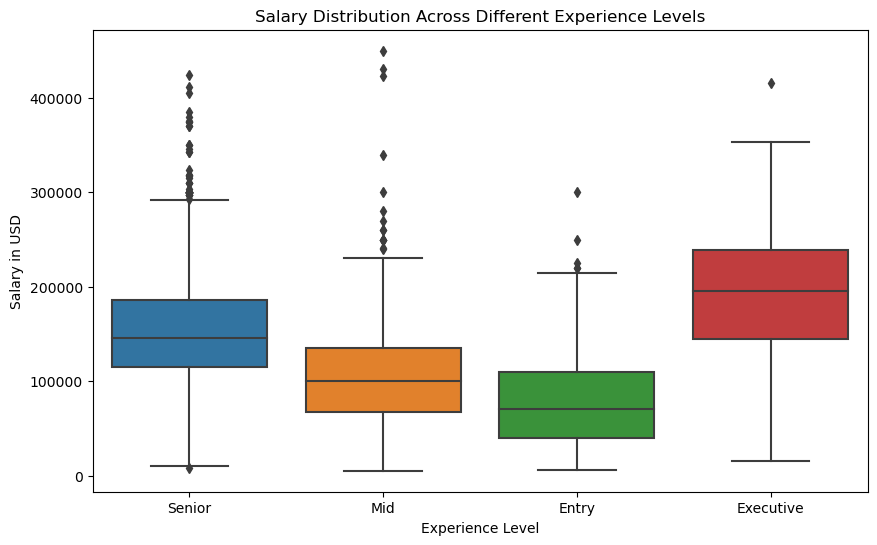

In [171]:
# Salary distribution across different employment types
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='experience_level', y='salary_in_usd')
plt.title('Salary Distribution Across Different Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()


In [172]:
senior_data = data[data['experience_level'] == 'Senior']
executive_data = data[data['experience_level'] == 'Executive']


senior_mean_salary = senior_data['salary_in_usd'].mean()
executive_mean_salary = executive_data['salary_in_usd'].mean()

senior_median_salary = senior_data['salary_in_usd'].median()
executive_median_salary = executive_data['salary_in_usd'].median()

senior_std_salary = senior_data['salary_in_usd'].std()
executive_std_salary = executive_data['salary_in_usd'].std()

# Print the summary statistics
print("Senior Level Statistics:")
print(f"Mean Salary: {senior_mean_salary:.2f}")
print(f"Median Salary: {senior_median_salary:.2f}")
print(f"Standard Deviation: {senior_std_salary:.2f}")

print("\nExecutive Level Statistics:")
print(f"Mean Salary: {executive_mean_salary:.2f}")
print(f"Median Salary: {executive_median_salary:.2f}")
print(f"Standard Deviation: {executive_std_salary:.2f}")


Senior Level Statistics:
Mean Salary: 153051.07
Median Salary: 146000.00
Standard Deviation: 56896.26

Executive Level Statistics:
Mean Salary: 194930.93
Median Salary: 196000.00
Standard Deviation: 70661.93


## Analysis II

The boxplots for salary based on experience level provide valuable insights into the distribution of salaries across different experience levels within the dataset. These boxplots offer a visual summary of the central tendency, spread, and potential outliers within each category. The entry and mid level boxplots are lower as expected, but the discrepancy in senior and executive levels seems a bit strange. In my understanding, senior level jobs require more experience and would have expected a higher salary. To double-check that the boxplots were not wrong, I took a look at the mean and median of senior and executive level salaries to find that indeed executive levels are earning more. Either I am wrong about the relationship about what a senior and an executive is, or perhaps there is a lack of data for the higher end positions relative to the much more common entry and mid level occupations. As previously highlighted, there is less than 3% of managers in this dataset afterall.

salary_in_usd: mu = 137570.390, sigma = 63047.228
salary_in_usd: Skewness: 0.536
salary_in_usd: Kurtosis: 0.834


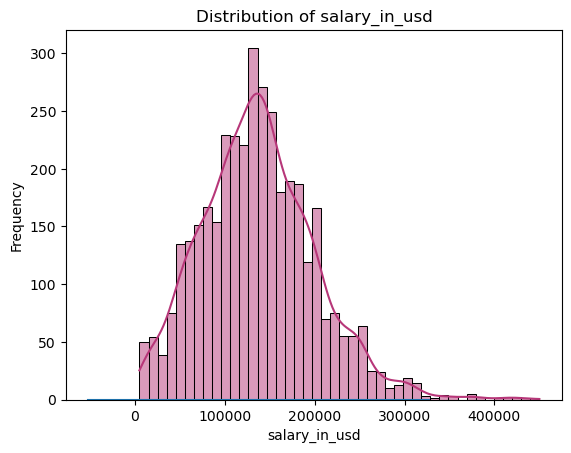

In [173]:
columns = ['salary_in_usd']

for col in columns:
    sns.histplot(data[col], kde=True, color=cmap(0.5))

    (mu, sigma) = stats.norm.fit(data[col])
    print('{}: mu = {:.3f}, sigma = {:.3f}'.format(col, mu, sigma))

    print('{}: Skewness: {:.3f}'.format(col, data[col].skew()))
    print('{}: Kurtosis: {:.3f}'.format(col, data[col].kurt()))

    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    y = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, y, label='Normal fit')

    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Distribution of {}'.format(col))



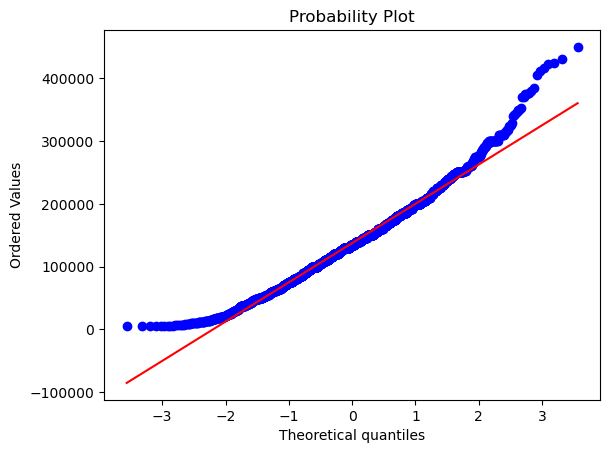

In [174]:
fig = plt.figure()
stats.probplot(data[col], plot=plt)

plt.show()

## Analysis III

A brief but necessary look into the normality of this dataset. The skewness of approximately 0.536 indicates a slight positive skew, suggesting that the salary distribution is right-skewed. This skewness implies that there are a few individuals with significantly higher salaries compared to the majority of earners. This is inline with what was previously found. Furthermore, the kurtosis, with a value of approximately 0.834, indicates a leptokurtic distribution. This means that the salary distribution has a more pronounced central peak and heavier tails compared to a normal distribution. Looking at the QQ-plot was well, the distribution of the Data Science Salary dataset is only decently normal.

In [175]:
# Function to convert ISO 3166 country code to country name
def country_code_to_name(country_code):
    try:
        return pycountry.countries.get(alpha_2=country_code).name
    except:
        return country_code
    # Function to convert country code to full name
def country_code_to_name(code):
    try:
        country = pycountry.countries.get(alpha_2=code)
        return country.name
    except:
        return None

data['company_location'] = data['company_location'].apply(country_code_to_name)
data['employee_residence'] = data['employee_residence'].apply(country_code_to_name)


In [176]:
# Average salary by employee_residence
avg_salary_by_residence = data.groupby('employee_residence', as_index=False)['salary_in_usd'].mean()

fig1 = px.choropleth(avg_salary_by_residence,
                     locations='employee_residence',
                     locationmode='country names',
                     color='salary_in_usd',
                     hover_name='employee_residence',
                     color_continuous_scale='magma',
                     title='Average Salary by Employee Residence',
                     labels={'salary_in_usd': 'Average Salary'}
                    )

fig1.show()

## Analysis IV

Using pycountry, country codes are turned into legible country names that can be used much easier. Plotly's chloropleth maps neatly display an interactive map to easily view the average salary from any country in the dataset. As expected, the US offers some the highest average salary. Malaysia is at an impressive 200,000 dollar average. China and Canada are also well paying countries. I was surprised to see that Data Science was not a very well paying job relatively in many European countries.

In [177]:
categorical_columns = ['experience_level', 'employment_type', 'remote_ratio','company_size','job_category']
numerical_columns = ['salary_in_usd']

dummy_variables = pd.get_dummies(data, columns=categorical_columns, drop_first=False)


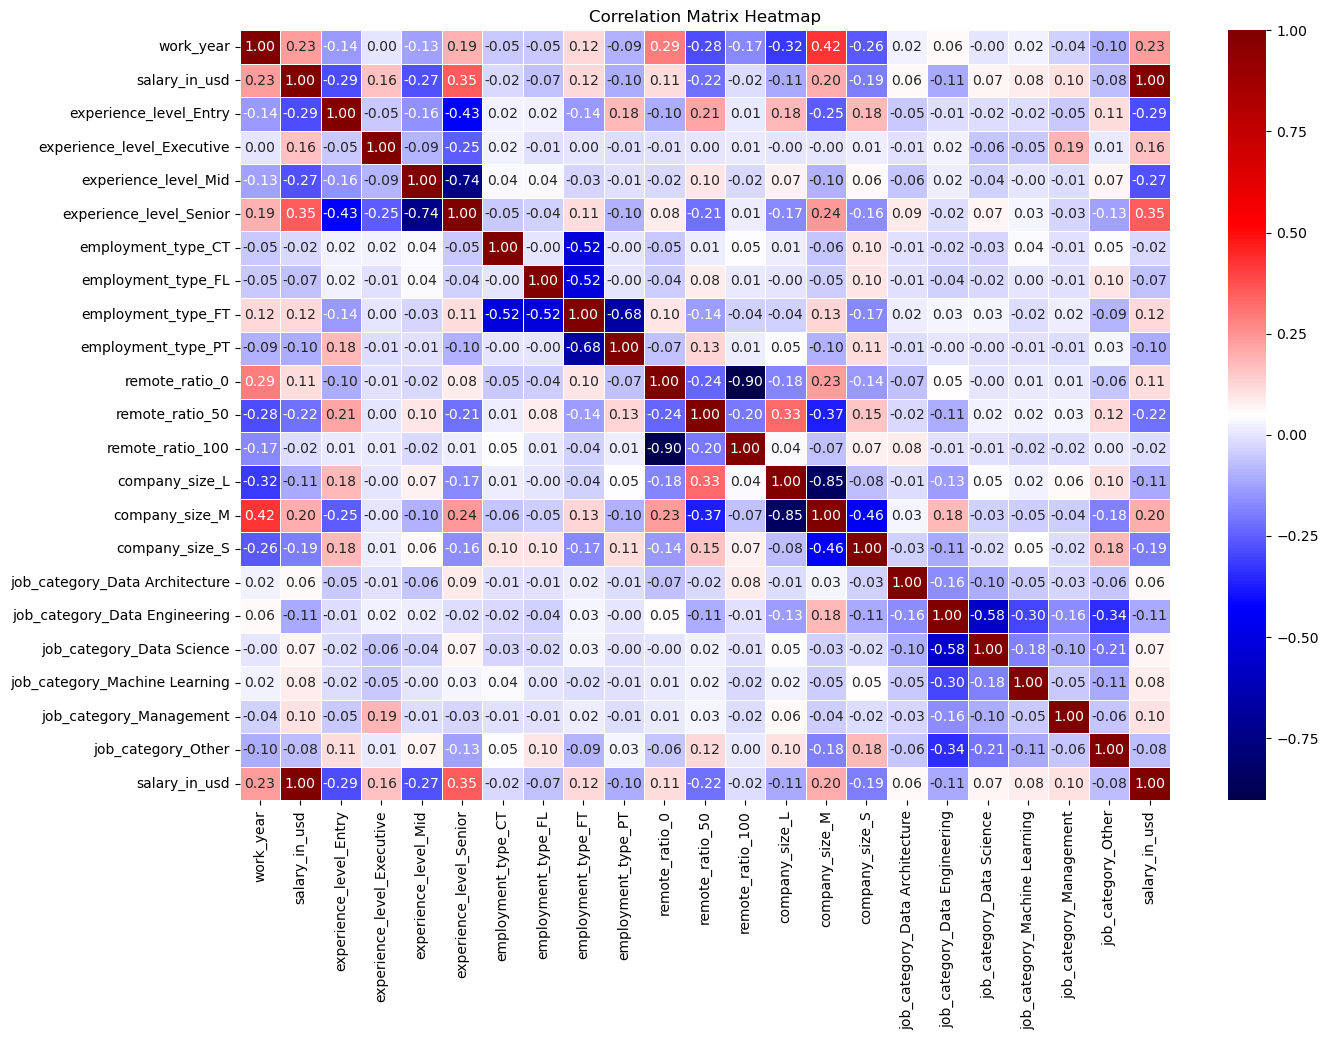

In [178]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale the numerical columns
scaled_numerical = scaler.fit_transform(data[numerical_columns])

# Convert the scaled numerical columns
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

# Concatenate the dummy variables and scaled numerical columns
processed_df = pd.concat([dummy_variables, scaled_numerical_df], axis=1)

correlation_matrix = processed_df.corr()

#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='seismic', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

## Analysis V

A correlation matrix is a statistical tool used to examine the strength and direction of linear relationships between pairs of variables in a dataset. In the context of your code, you have calculated the correlation matrix for a set of variables after preprocessing the data.

The correlation matrix is a square matrix where each entry represents the correlation coefficient between two variables. The correlation coefficient, typically denoted by "r," ranges from -1 to 1. The more red in color, the increasingly significant the relationship between variables are. For example, It looks like being a senior in experience level is more correlated with salary_in_usd, compared to something like being an on-site worker.

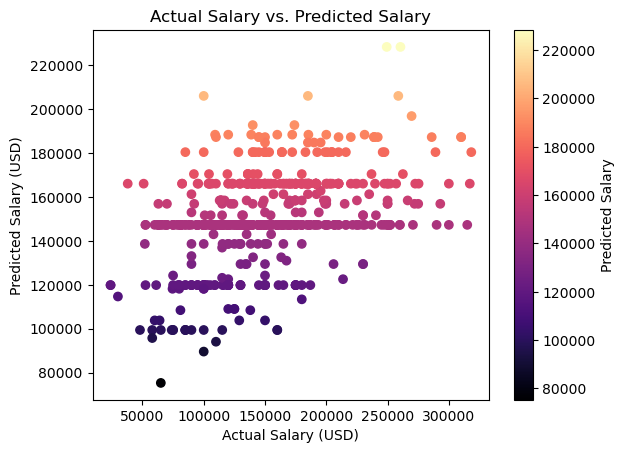

Mean Squared Error: 2340111376.69
R-squared (Coefficient of Determination): 0.18


In [179]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from scipy import stats

data_us_residence = data[data['employee_residence'] == 'United States']
categorical_features = ['employment_type', 'job_category', 'experience_level', 'company_size']
X = data_us_residence[categorical_features]
y = data_us_residence["salary_in_usd"]
encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = encoder.fit_transform(X)
z_scores = np.abs(stats.zscore(y))
threshold = 3
no_outliers_mask = (z_scores < threshold)
X_encoded_no_outliers = X_encoded[no_outliers_mask]
y_no_outliers = y[no_outliers_mask]
X_train, X_test, y_train, y_test = train_test_split(X_encoded_no_outliers, y_no_outliers, test_size=0.2, random_state=42)
model = Pipeline([
    ('regressor', LinearRegression())
])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cmap = plt.get_cmap('magma')
colors = y_pred
plt.scatter(y_test, y_pred, c=colors, cmap=cmap)
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.title('Actual Salary vs. Predicted Salary')
plt.colorbar(label='Predicted Salary')
plt.show()
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared (Coefficient of Determination): {r2:.2f}')


## Predictive Modeling I

In the first test, we perform data analysis and regression modeling to predict salaries based on several categorical features.

We begin by filtering a given dataset to include only employees residing in the United States. This was done as salary fluctuates heavily between countries, and more importantly as an student in the US, it felt more relevant to me. It then selects specific categorical features that may influence an employee's salary, such as employment type, job category, experience level, and company size. The goal is to predict the "salary_in_usd" variable based on these categorical features.

To prepare the data for modeling, it employs one-hot encoding to convert the categorical variables into a numerical format that can be used by a machine learning algorithm. This creates binary dummy variables for each category, and the 'drop="first"' parameter ensures that one level of each categorical variable is dropped to avoid multicollinearity.

Next, We identify and removes outliers from the "salary_in_usd" variable using Z-scores. Z-scores measure how many standard deviations a data point is from the mean, and a threshold of 3 is set to identify extreme outliers. Data points with Z-scores beyond this threshold are considered outliers and are removed from the dataset.

The data is then split into training and testing sets using an 80-20 split ratio. A linear regression model is created using a pipeline, which includes the "LinearRegression" estimator. The model is trained on the training data. Our result shows an MSE of 2340111376.69 and an R-squared of 0.18. This is fairly weak, suggesting that the categories we chose did not sufficiently explain the differences in salary. There may be several reasons for this, such as insufficient data, or that the variables do not follow a linear pattern.

In [180]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data_us_residence = data[data['employee_residence'] == 'United States']

data_us_residence['above_100k'] = (data_us_residence['salary_in_usd'] > 100000).astype(int)

categorical_features = ['employment_type', 'job_category', 'experience_level', 'company_size']

X = data_us_residence[categorical_features]
Y = data_us_residence['above_100k']

encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = encoder.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=42)

model = Pipeline([
    ('classifier', LogisticRegression())
])

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.83
Confusion Matrix:
[[ 15  96]
 [  7 483]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.14      0.23       111
           1       0.83      0.99      0.90       490

    accuracy                           0.83       601
   macro avg       0.76      0.56      0.56       601
weighted avg       0.81      0.83      0.78       601



## Predictive Modeling II

In the next test, we use an example of binary classification using logistic regression to predict whether employees in the United States earn above $100,000 annually based on categorical features.

The code begins by filtering the dataset to include only employees residing in the United States. It then creates a binary target variable, "above_100k," which is set to 1 if an employee's salary exceeds $100,000 and 0 otherwise. The categorical features considered as predictors include employment type, job category, experience level, and company size. Like the previous test, we use one-hot encoding and split the dataset. 

The logistic regression model achieved an accuracy of 0.83 on the binary classification task, indicating that it correctly predicted whether an employee in the United States earns above or below 100,000 dollars in approximately 83 percent of cases. However, a closer look at the confusion matrix reveals that the model had some challenges distinguishing employees earning above $100,000 (class 1) from those earning below (class 0). Specifically, it correctly identified the majority of high earners (sensitivity or recall of 0.99), but it had a relatively low precision of 0.68 for classifying low earners. This means that while the model was excellent at identifying high earners, it had a higher rate of false positives (classifying low earners as high earners) than desired. Overall, the weighted F1-score of 0.78 indicates a reasonable balance between precision and recall, but there is room for improvement, especially in correctly identifying low earners.


# Summary

The Data Science dataset was an excellent dataset to analyze as someone who is going to be entering the workforce. I was able to get a general idea of what the average salary is going to look like for various levels of experience. It was satisying to put into action several statistical techniques that I am learning in class. Overall, the models were not very accurate in predicting salary_in_usd. This suggests that a given salary is a very complex and varying decision.

Given that, there are several ways to potentially improve the model performance:
Feature Engineering:  In my models, I combined all of the categories, but I could also try using interaction terms.

Feature Selection: Perhaps its better to look at one specific category, or maybe even more categories at once.

Different Models: There are more models out there.

I look forward to further advancing my skills in data analysis.